In [ ]:
# Tutorial de Extração de Componentes Principais de Discriminação no banco sintético

# Autor: Natanael Junior (natmourajr@gmail.com)
# Laboratorio de Processamento de Sinais - UFRJ

In [3]:
# Import Libs
import time
init_time = time.time()

import os
import pickle
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 20

current_time = time.time()
print 'Time to import libraries: %1.3f seconds'%(current_time-init_time)

Time to import libraries: 0.663 seconds


Time to create data: 0.001 seconds


(-2, 2)

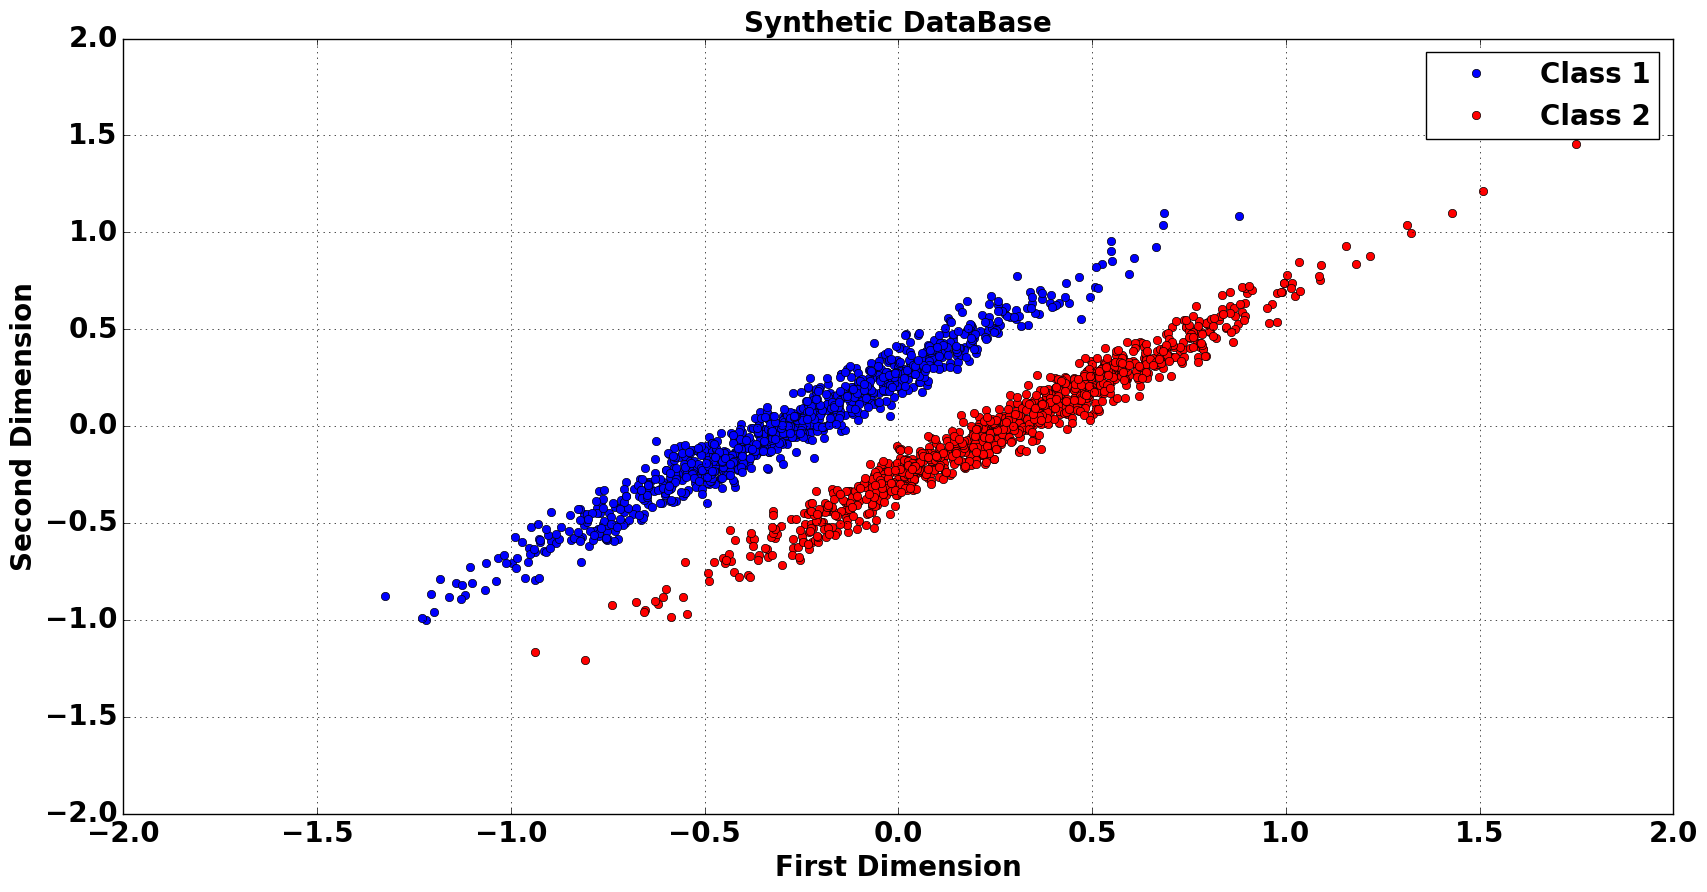

In [22]:
# Create Data

init_time = time.time()

# dados em 45^o
rotation_matrix = [[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]]

m_means = [-0.2,0.2]
m_vars = [0.5,0.05]

data_c1 = m_vars*np.random.randn(1000,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)


m_means = [0.2,-0.2]
m_vars = [0.5,0.05]

data_c2 = m_vars*np.random.randn(1000,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

data = np.append(data_c1, data_c2,axis=0)
trgt = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

current_time = time.time()
print 'Time to create data: %1.3f seconds'%(current_time-init_time)

# plot data
%matplotlib inline  

fig = plt.figure(figsize=(20,10))

plt.plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
plt.plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')

plt.legend()
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=20)
plt.xlabel('First Dimension',fontweight='bold',fontsize=20)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=20)
limits = [-2, 2]
plt.xlim(limits)
plt.ylim(limits)

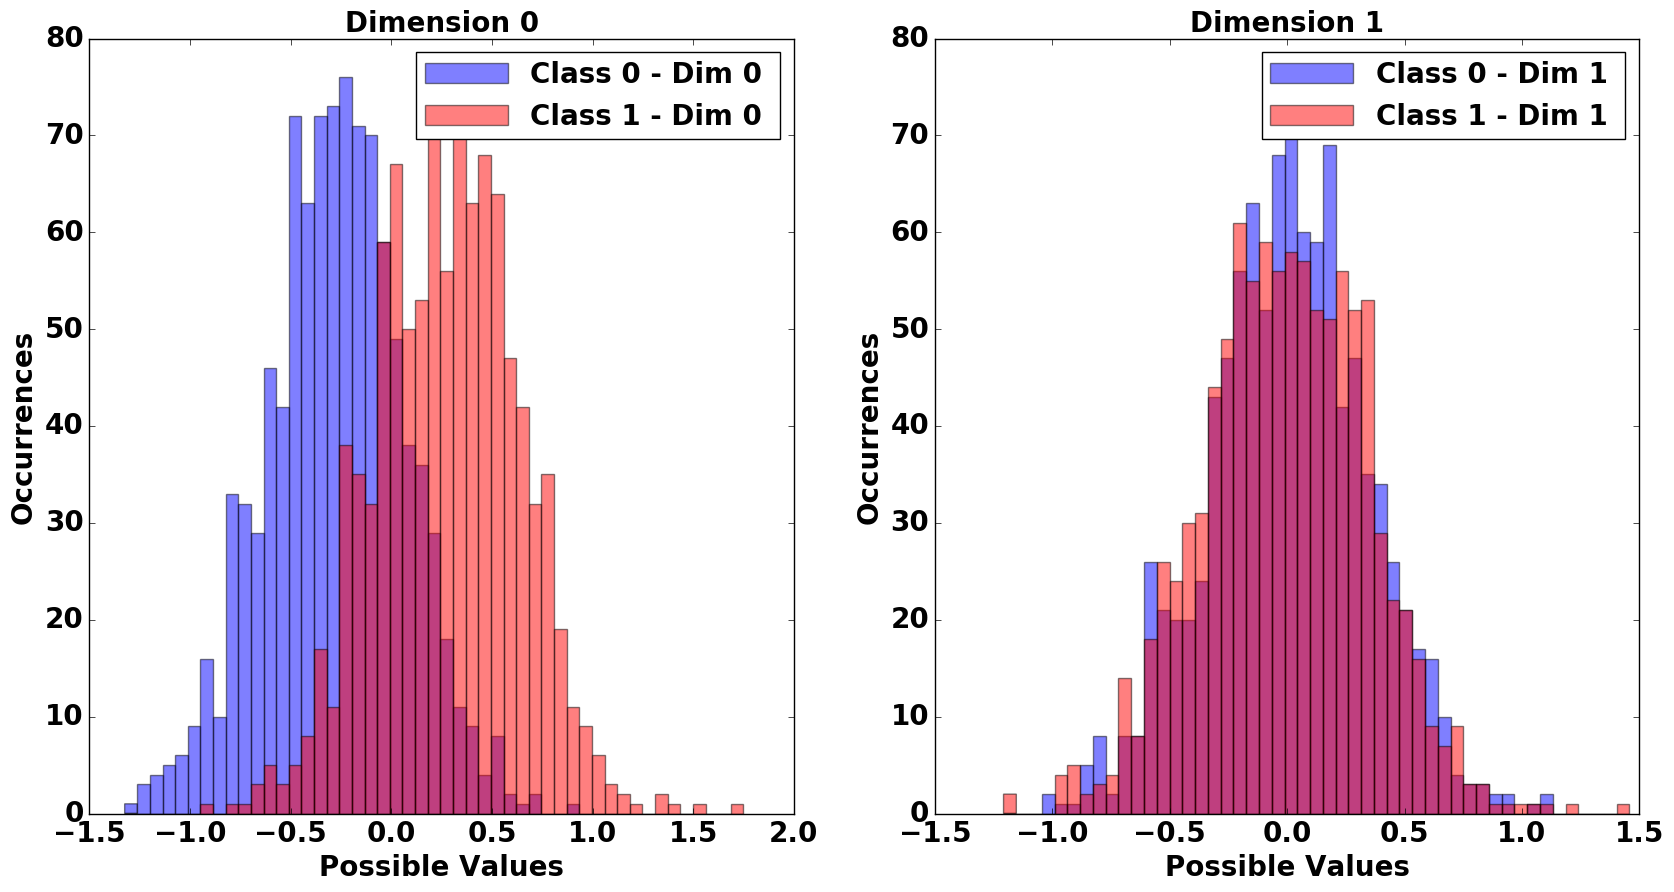

In [23]:
# Plot Distributions
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10),nrows=1, ncols=data.shape[1])

m_colors = ['b','r']

for iclass in range(2):
    for idim in range(data.shape[1]):
        n_bins = np.linspace(data[:,idim].min(),data[:,idim].max(),50)
        n, bins, patches = ax[idim].hist(data[trgt==iclass,idim],
                                                 bins=n_bins,fc=m_colors[iclass],
                                                 alpha=0.5,label='Class %i - Dim %i '%(iclass,idim))
        ax[idim].legend(loc='best')
        ax[idim].grid()
        
        ax[idim].set_title('Dimension %i'%(idim),fontsize=20,fontweight='bold')
        ax[idim].set_xlabel('Possible Values',fontsize=20,fontweight='bold')
        ax[idim].set_ylabel('Occurrences',fontsize=20,fontweight='bold')



(-5, 5)

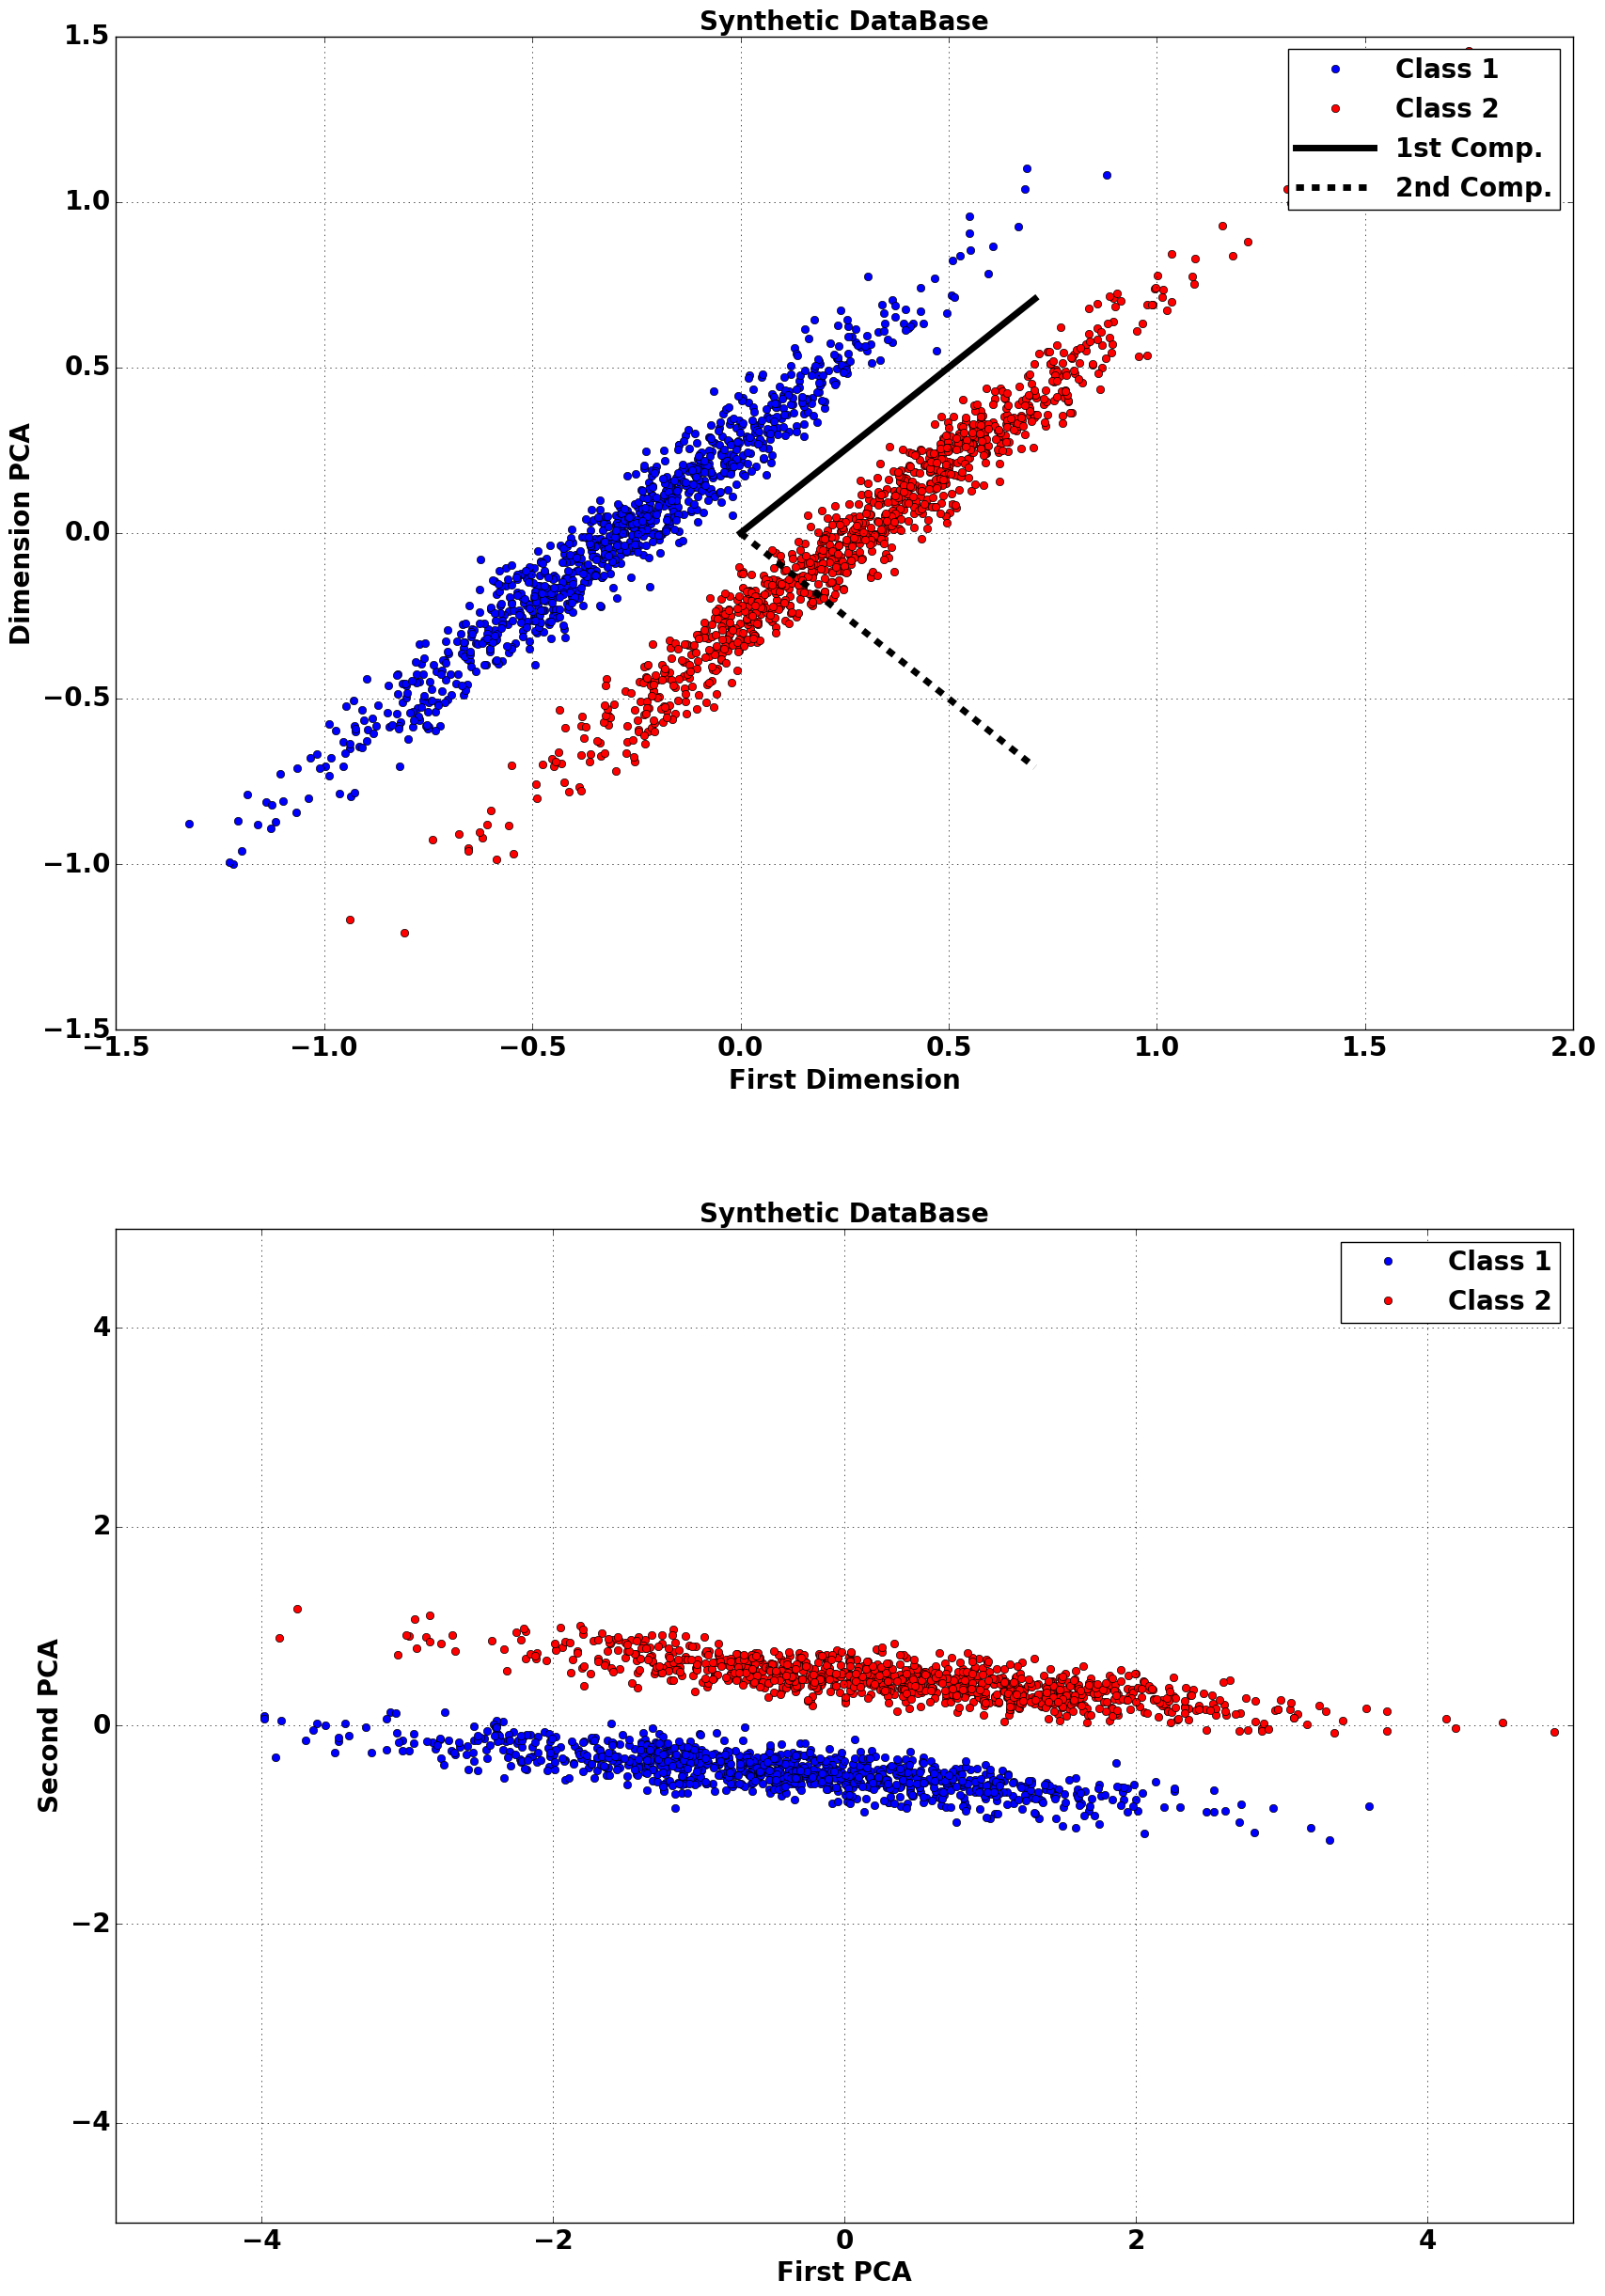

In [24]:
# PCA Decomp.

from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn import preprocessing

CVO = cross_validation.StratifiedKFold(trgt, 10)
CVO = list(CVO)

train_id, test_id = CVO[0]

norm = 'mapstd'

# normalize data based in train set
if norm == 'mapstd':
    scaler = preprocessing.StandardScaler().fit(data[train_id,:])
elif norm == 'mapstd_rob':
    scaler = preprocessing.RobustScaler().fit(data[train_id,:])
elif norm == 'mapminmax':
    scaler = preprocessing.MinMaxScaler().fit(data[train_id,:])
        
if norm == 'none':
    norm_data = data
else:
    norm_data = scaler.transform(data)
    
pca = PCA(n_components=norm_data.shape[1])
pca.fit(norm_data[train_id,:])
pca_energy = pca.explained_variance_/np.sum(pca.explained_variance_)

proj_norm_data = pca.transform(norm_data)


# plot data
%matplotlib inline  


fig, ax = plt.subplots(figsize=(20,30),nrows=2, ncols=1)

ax[0].plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
ax[0].plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')


ax[0].plot([0,pca.components_[0,0]],[0,pca.components_[0,1]],'k-',linewidth=5.0,label='1st Comp.')
ax[0].plot([0,pca.components_[1,0]],[0,pca.components_[1,1]],'k--',linewidth=5.0,label='2nd Comp.')


ax[0].legend()
ax[0].grid()
ax[0].set_title('Synthetic DataBase',fontweight='bold',fontsize=20)
ax[0].set_xlabel('First Dimension',fontweight='bold',fontsize=20)
ax[0].set_ylabel('Dimension PCA',fontweight='bold',fontsize=20)


ax[1].plot(proj_norm_data[trgt==0,0],proj_norm_data[trgt==0,1],'bo',label='Class 1')
ax[1].plot(proj_norm_data[trgt==1,0],proj_norm_data[trgt==1,1],'ro',label='Class 2')

ax[1].legend()
ax[1].grid()
ax[1].set_title('Synthetic DataBase',fontweight='bold',fontsize=20)
ax[1].set_xlabel('First PCA',fontweight='bold',fontsize=20)
ax[1].set_ylabel('Second PCA',fontweight='bold',fontsize=20)

limits = [-5, 5]
ax[1].set_xlim(limits)
ax[1].set_ylim(limits)


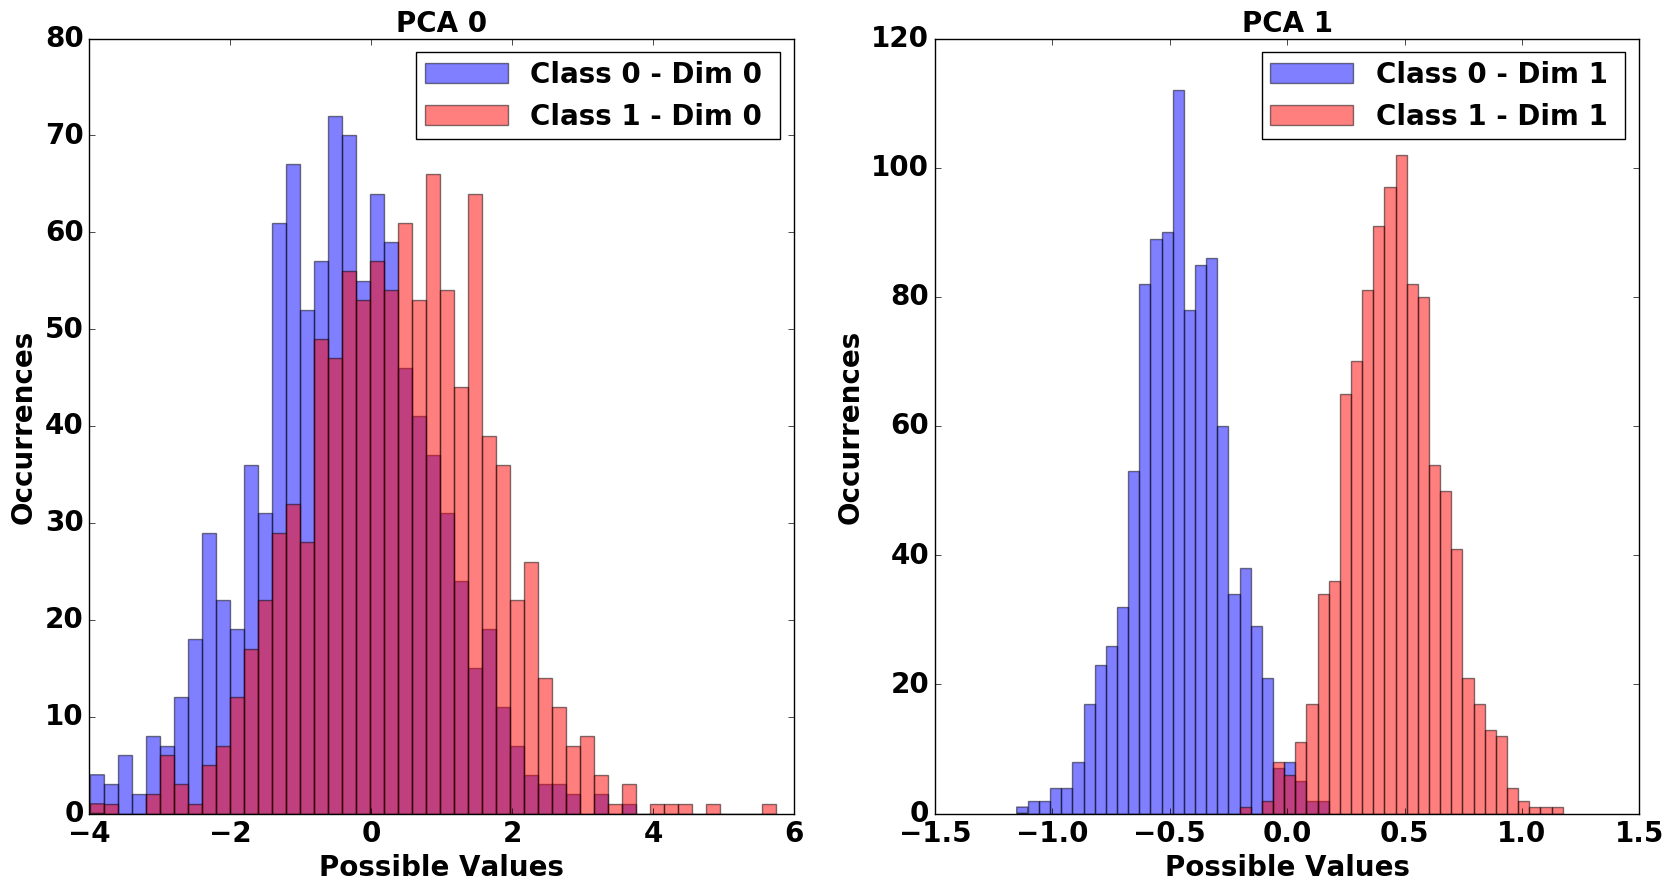

In [25]:
# Plot Distributions
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10),nrows=1, ncols=proj_norm_data.shape[1])

m_colors = ['b','r']

for iclass in range(2):
    for idim in range(proj_norm_data.shape[1]):
        n_bins = np.linspace(proj_norm_data[:,idim].min(),proj_norm_data[:,idim].max(),50)
        n, bins, patches = ax[idim].hist(proj_norm_data[trgt==iclass,idim],
                                                 bins=n_bins,fc=m_colors[iclass],
                                                 alpha=0.5,label='Class %i - Dim %i '%(iclass,idim))
        ax[idim].legend(loc='best')
        ax[idim].grid()
        ax[idim].set_title('PCA %i'%(idim),fontsize=20,fontweight='bold')
        ax[idim].set_xlabel('Possible Values',fontsize=20,fontweight='bold')
        ax[idim].set_ylabel('Occurrences',fontsize=20,fontweight='bold')


In [18]:
from sklearn import cross_validation
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.layers import Merge


def pcdi_extractor(inputdata, targetdata, trn_params=None):
    ''' 
        This function extracts the Independent Principal Components of Discrimination of a Dataset
        
        Parameters:
            inputdata: dataset with inputs
            
            targetdata: each class -> an integer
            
            trn_params: train parameters
            
            trn_params['n_folds'] = number of cross validation folds
            trn_params['n_inits'] = number of initializations
            trn_params['n_pcds'] = number of PCDs to be extracted
            trn_params['norm'] = normalization
            trn_params['learning_rate'] = learning rate
            trn_params['learning_decay'] = learning rate decay
            trn_params['momentum'] = momentum
            trn_params['nesterov'] = nesterov momentum
            trn_params['train_verbose'] = train verbose
            trn_params['n_epochs'] = number of epochs
            trn_params['batch_size'] = batch size
        
    '''
    
    if trn_params == None:
        trn_params = {}
        trn_params['n_folds'] = 2
        trn_params['n_inits'] = 2
        trn_params['n_pcds'] = 2
        trn_params['norm'] = 'none'
        trn_params['learning_rate'] = 0.01
        trn_params['learning_decay'] = 1e-6
        trn_params['momentum'] = 0.3
        trn_params['nesterov'] = True
        trn_params['train_verbose'] = False
        trn_params['n_epochs'] = 300
        trn_params['batch_size'] = 8

    print 'PCD Independent Extractor'
    print 'trn_params: ',trn_params
    
    # trained classifiers
    classifiers = {}
    trn_desc = {}
    pcds = {}
    
    CVO = cross_validation.StratifiedKFold(targetdata, trn_params['n_folds'])
    CVO = list(CVO)
    
    # from each class an integer -> target max sparse
    targetdata_sparse = np_utils.to_categorical(targetdata)
    
    for ifold in range(trn_params['n_folds']):
        train_id, test_id = CVO[ifold]

        # normalize data based in train set
        if trn_params['norm'] == 'mapstd':
            scaler = preprocessing.StandardScaler().fit(inputdata[train_id,:])
        elif trn_params['norm'] == 'mapstd_rob':
            scaler = preprocessing.RobustScaler().fit(inputdata[train_id,:])
        elif trn_params['norm'] == 'mapminmax':
            scaler = preprocessing.MinMaxScaler().fit(inputdata[train_id,:])
        
        if trn_params['norm'] != "none":
            norm_inputdata = scaler.transform(inputdata)
        else:
            norm_inputdata = inputdata
         
        
        classifiers[ifold] = {}
        trn_desc[ifold] = {}
        pcds[ifold] = {}
        
        for ipcd in range(trn_params['n_pcds']):
            best_init = 0
            best_loss = 999
            
            if ipcd == 0:
                # first pcd - random init
                for i_init in range(trn_params['n_inits']):
                    # create the model
                    model = Sequential()
                    
                    # add a linear layer to isolate the input of NN model
                    model.add(Dense(norm_inputdata.shape[1],
                                input_dim=norm_inputdata.shape[1], 
                                init='identity',trainable=False))
                    model.add(Activation('linear'))
                    
                    # add a non-linear single neuron layer to compress all information
                    model.add(Dense(1, input_dim=norm_inputdata.shape[1], init='uniform'))
                    model.add(Activation('tanh'))
                    
                    # add a non-linear output layer with max sparse target shape
                    model.add(Dense(targetdata_sparse.shape[1], init='uniform')) 
                    model.add(Activation('tanh'))
                    
                    # creating a optimization function using steepest gradient
                    sgd = SGD(lr=trn_params['learning_rate'],
                              decay=trn_params['learning_decay'],
                              momentum=trn_params['momentum'],
                              nesterov=trn_params['nesterov'])
                    
                    # compile the model
                    model.compile(loss='mean_squared_error', 
                                  optimizer=sgd,
                                  metrics=['accuracy','mean_squared_error'])
                    
                    # early stopping to avoid overtraining
                    earlyStopping = callbacks.EarlyStopping(
                        monitor='val_loss', patience=25,
                        verbose=0, mode='auto')
                    
                    # Train model
                    init_trn_desc = model.fit(norm_inputdata[train_id], targetdata_sparse[train_id],
                                              nb_epoch=trn_params['n_epochs'], 
                                              batch_size=trn_params['batch_size'],
                                              callbacks=[earlyStopping], 
                                              verbose=trn_params['train_verbose'],
                                              validation_data=(norm_inputdata[test_id],
                                                               targetdata_sparse[test_id]),
                                              shuffle=True)
                    
                    if np.min(init_trn_desc.history['val_loss']) < best_loss:
                        best_init = i_init
                        best_loss = np.min(init_trn_desc.history['val_loss'])
                        classifiers[ifold][ipcd] = model
                        trn_desc[ifold][ipcd] = init_trn_desc
                        pcds[ifold][ipcd] = model.layers[2].get_weights()[0]
                    
                    print ('Fold: %i of %i - PCD: %i of %i - Init: %i of %i - finished with val cost: %1.3f'%
                           (ifold+1,trn_params['n_folds'],
                            ipcd+1,trn_params['n_pcds'],
                            i_init+1,trn_params['n_inits'],
                            best_loss
                           ))
                    
            else: # ipcd != 0
                # from second pcd to the end - orthogonal init
                for i_init in range(trn_params['n_inits']):
                    # create the model
                    model = Sequential()
                    
                    # add a linear layer to isolate the input of NN model
                    model.add(Dense(norm_inputdata.shape[1],
                                input_dim=norm_inputdata.shape[1], 
                                init='identity',trainable=False))
                    model.add(Activation('linear'))
                    
                    # add a non-linear single neuron layer to compress all information
                    model.add(Dense(1, input_dim=norm_inputdata.shape[1], init='uniform'))
                    model.add(Activation('tanh'))
                    
                    # add a non-linear output layer with max sparse target shape
                    model.add(Dense(targetdata_sparse.shape[1], init='uniform')) 
                    model.add(Activation('tanh'))
                    
                    # creating a optimization function using steepest gradient
                    sgd = SGD(lr=trn_params['learning_rate'],
                              decay=trn_params['learning_decay'],
                              momentum=trn_params['momentum'],
                              nesterov=trn_params['nesterov'])
                    
                    # compile the model
                    model.compile(loss='mean_squared_error', 
                                  optimizer=sgd,
                                  metrics=['accuracy','mean_squared_error'])
                    
                    # early stopping to avoid overtraining
                    earlyStopping = callbacks.EarlyStopping(
                        monitor='val_loss', patience=25,
                        verbose=0, mode='auto')
                    
                    
                    # remove the projection of previous extracted pcds from random init weights
                    w = model.layers[2].get_weights()[0]
                    w_proj = np.zeros_like(w)
                    for i_old_pcd in range(ipcd):
                        w_proj = w_proj + (np.inner(np.inner(pcds[ifold][i_old_pcd],w), 
                                                    pcds[ifold][i_old_pcd].T)/
                                           np.inner(pcds[ifold][i_old_pcd].T, 
                                                    pcds[ifold][i_old_pcd].T))
                    w_remove_proj = w - w_proj
                    weights = model.layers[2].get_weights()
                    weights[0] = w_remove_proj
                    model.layers[2].set_weights(weights)
                    
                    # remove the projection of previous extracted pcds from data
                    data_proj = np.zeros_like(norm_inputdata)
                    for i_old_pcd in range(ipcd-1):
                        data_proj = (data_proj + 
                                     (np.inner(np.inner(pcds[ifold][i_old_pcd].T,
                                                        norm_inputdata).T,
                                               pcds[ifold][i_old_pcd])/
                                      np.inner(pcds[ifold][i_old_pcd].T,
                                               pcds[ifold][i_old_pcd].T)))
                    train_data = norm_inputdata - data_proj
                    
                    # Train model with modified data
                    init_trn_desc = model.fit(train_data[train_id], targetdata_sparse[train_id],
                                              nb_epoch=trn_params['n_epochs'], 
                                              batch_size=trn_params['batch_size'],
                                              callbacks=[earlyStopping], 
                                              verbose=trn_params['train_verbose'],
                                              validation_data=(train_data[test_id],
                                                               targetdata_sparse[test_id]),
                                              shuffle=True)
                    
                    if np.min(init_trn_desc.history['val_loss']) < best_loss:
                        best_init = i_init
                        best_loss = np.min(init_trn_desc.history['val_loss'])
                        classifiers[ifold][ipcd] = model
                        trn_desc[ifold][ipcd] = init_trn_desc
                        pcds[ifold][ipcd] = model.layers[2].get_weights()[0]
                    
                    
                    print ('Fold: %i of %i - PCD: %i of %i - Init: %i of %i - finished with val cost: %1.3f'%
                           (ifold+1,trn_params['n_folds'],
                            ipcd+1,trn_params['n_pcds'],
                            i_init+1,trn_params['n_inits'],
                            best_loss
                           ))

    # add cross-validation information in train desc.
    trn_desc['CVO'] = CVO
    
    return [pcds,classifiers,trn_desc]

In [26]:
# Extract PCD Independent
trn_params = {}
trn_params['n_folds'] = 2
trn_params['n_inits'] = 2
trn_params['n_pcds'] = 2
trn_params['norm'] = 'mapstd'
trn_params['learning_rate'] = 0.01
trn_params['learning_decay'] = 1e-4
trn_params['momentum'] = 0.9
trn_params['nesterov'] = True
trn_params['train_verbose'] = False
trn_params['n_epochs'] = 500
trn_params['batch_size'] = 3


[pcds,pcd_classifiers,pcd_trn_desc] = pcdi_extractor(data,trgt,trn_params)

PCD Independent Extractor
trn_params:  {'nesterov': True, 'learning_rate': 0.01, 'n_inits': 2, 'batch_size': 3, 'n_epochs': 500, 'train_verbose': False, 'learning_decay': 0.0001, 'momentum': 0.9, 'n_folds': 2, 'norm': 'mapstd', 'n_pcds': 2}
Fold: 1 of 2 - PCD: 1 of 2 - Init: 1 of 2 - finished with val cost: 0.001
Fold: 1 of 2 - PCD: 1 of 2 - Init: 2 of 2 - finished with val cost: 0.001
Fold: 1 of 2 - PCD: 2 of 2 - Init: 1 of 2 - finished with val cost: 0.001
Fold: 1 of 2 - PCD: 2 of 2 - Init: 2 of 2 - finished with val cost: 0.001
Fold: 2 of 2 - PCD: 1 of 2 - Init: 1 of 2 - finished with val cost: 0.001
Fold: 2 of 2 - PCD: 1 of 2 - Init: 2 of 2 - finished with val cost: 0.001
Fold: 2 of 2 - PCD: 2 of 2 - Init: 1 of 2 - finished with val cost: 0.001
Fold: 2 of 2 - PCD: 2 of 2 - Init: 2 of 2 - finished with val cost: 0.001


In [44]:
pcds[0][1][1,0]

3.4306633

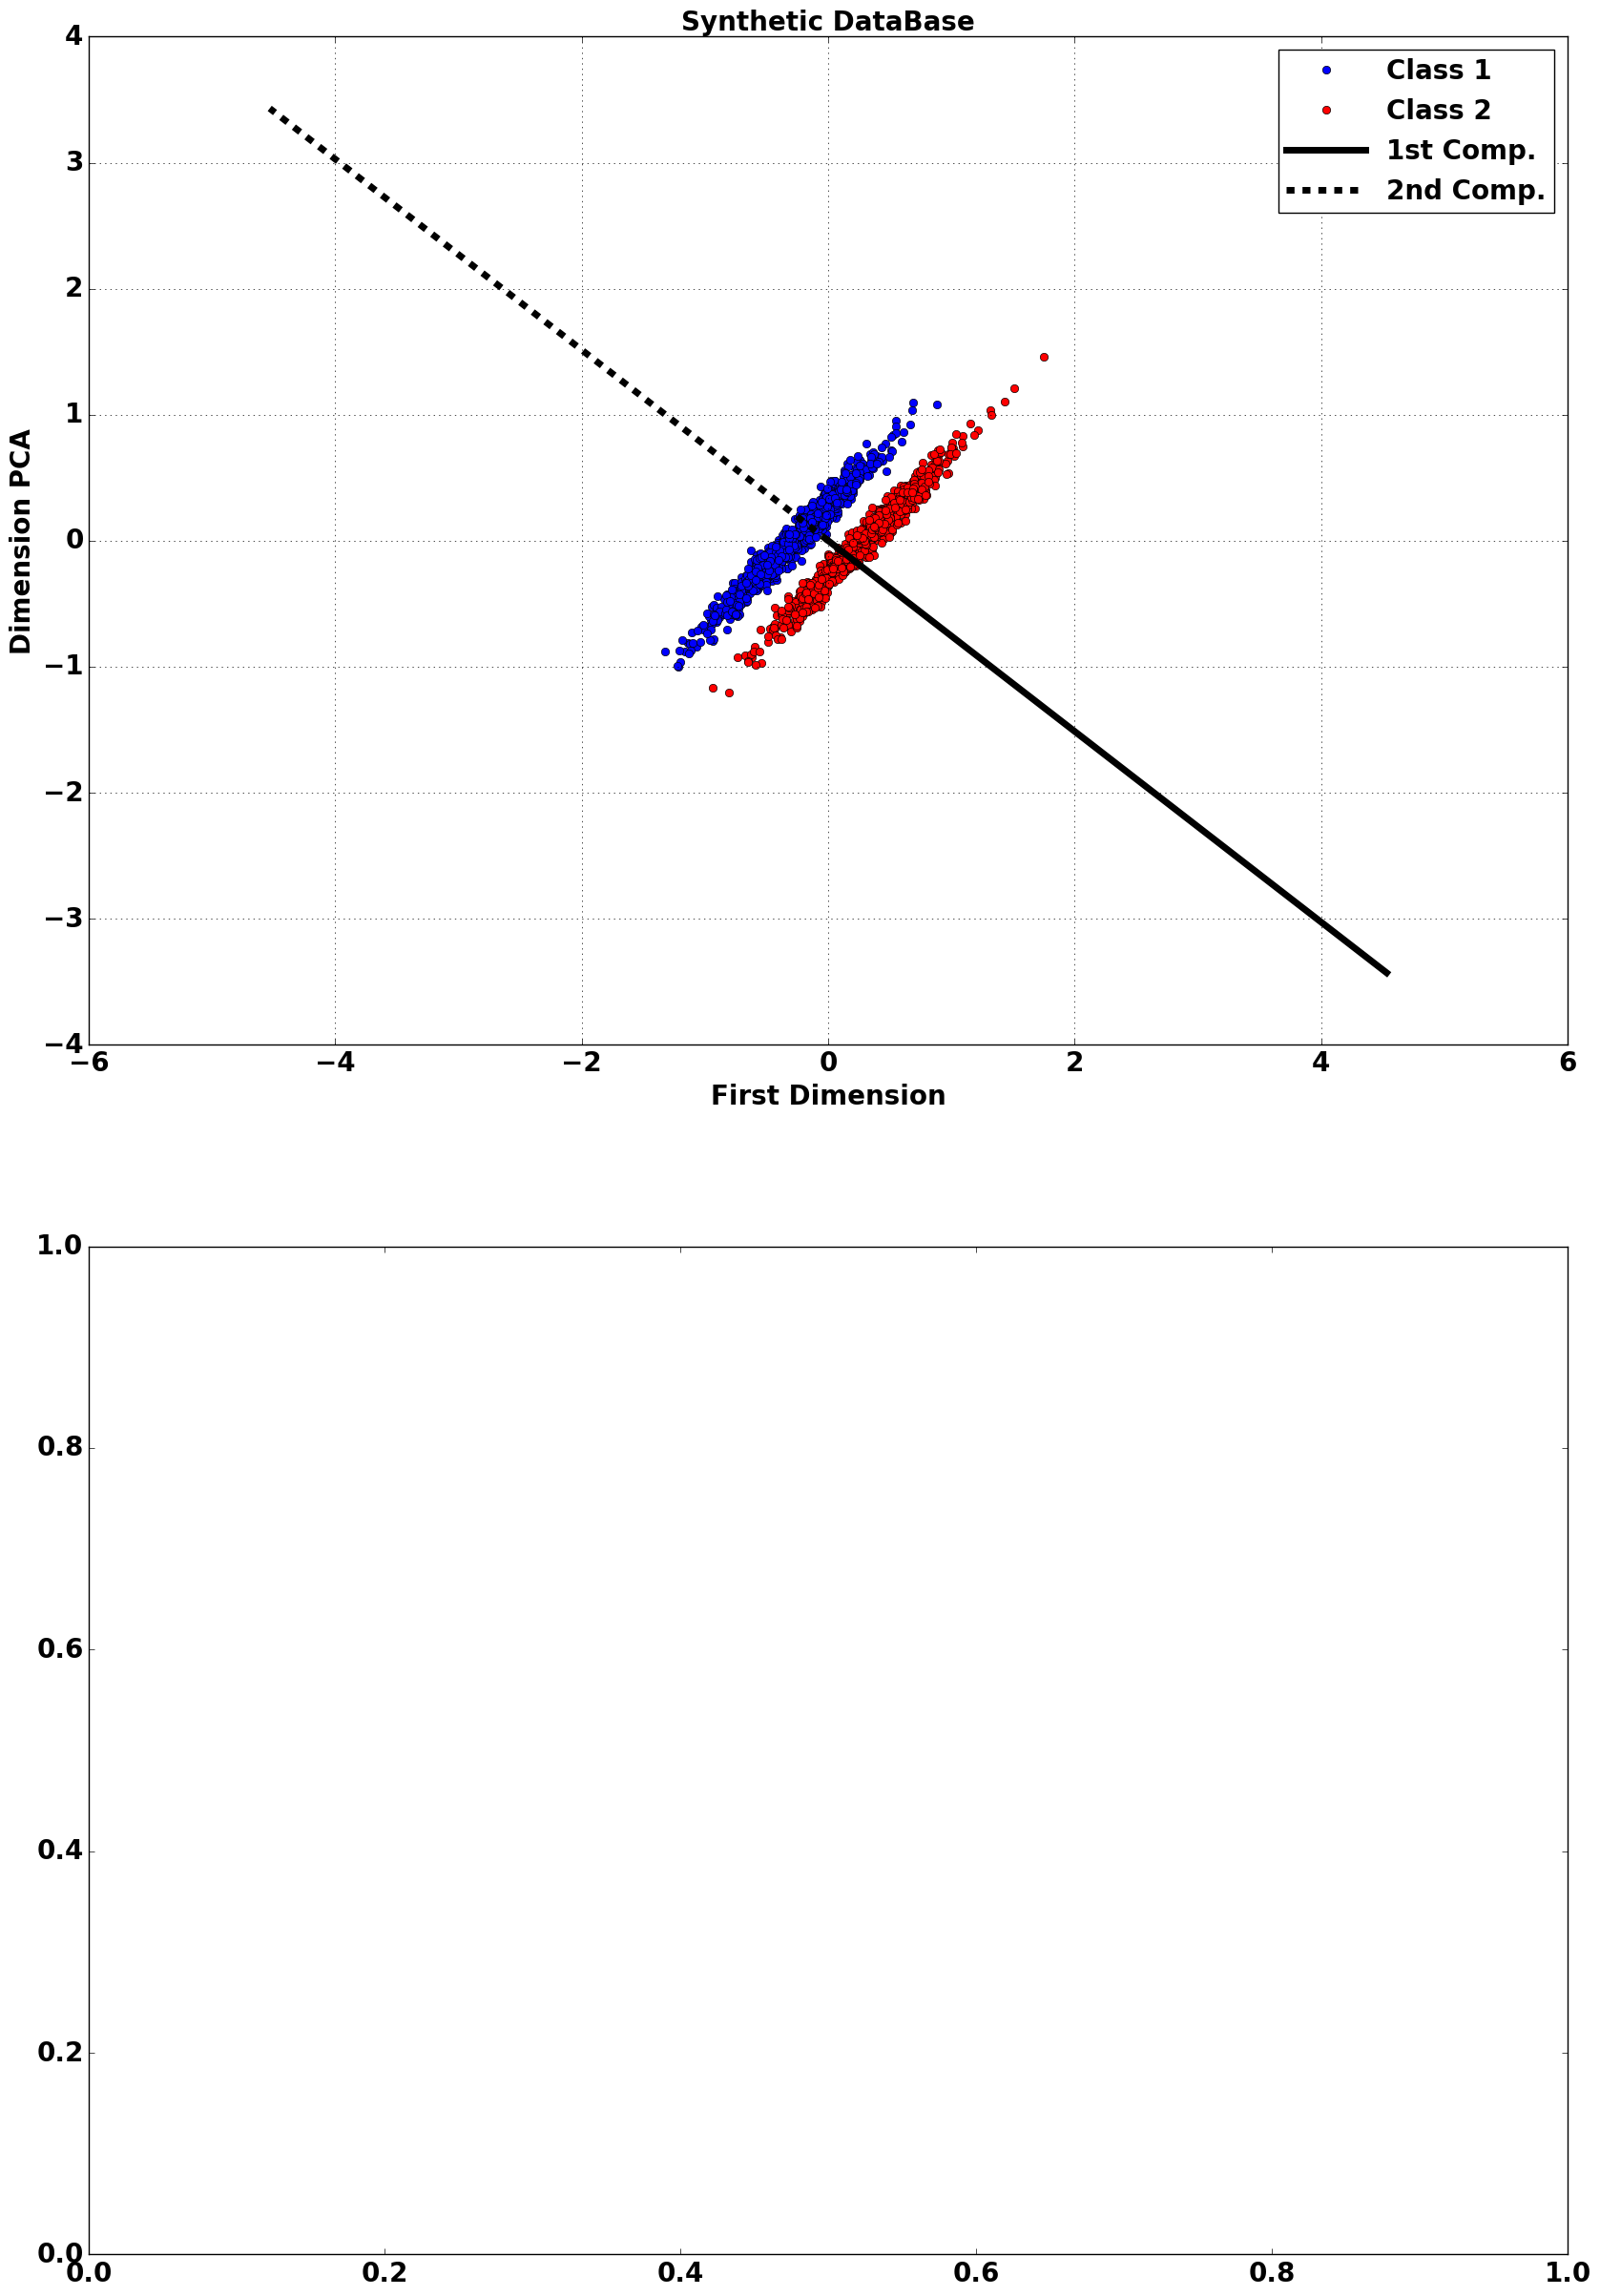

In [45]:
# PCD show.

# plot data
%matplotlib inline  


fig, ax = plt.subplots(figsize=(20,30),nrows=2, ncols=1)

ax[0].plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
ax[0].plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')


ax[0].plot([0,pcds[0][0][0,0]],[0,pcds[0][0][1,0]],'k-',linewidth=5.0,label='1st Comp.')
ax[0].plot([0,pcds[0][1][0,0]],[0,pcds[0][1][1,0]],'k--',linewidth=5.0,label='2nd Comp.')


ax[0].legend()
ax[0].grid()
ax[0].set_title('Synthetic DataBase',fontweight='bold',fontsize=20)
ax[0].set_xlabel('First Dimension',fontweight='bold',fontsize=20)
ax[0].set_ylabel('Dimension PCA',fontweight='bold',fontsize=20)


# ax[1].plot(proj_norm_data[trgt==0,0],proj_norm_data[trgt==0,1],'bo',label='Class 1')
# ax[1].plot(proj_norm_data[trgt==1,0],proj_norm_data[trgt==1,1],'ro',label='Class 2')

# ax[1].legend()
# ax[1].grid()
# ax[1].set_title('Synthetic DataBase',fontweight='bold',fontsize=20)
# ax[1].set_xlabel('First PCA',fontweight='bold',fontsize=20)
# ax[1].set_ylabel('Second PCA',fontweight='bold',fontsize=20)

# limits = [-5, 5]
# ax[1].set_xlim(limits)
# ax[1].set_ylim(limits)
